In [1]:
import importlib_resources
import numpy as np
import pandas as pd

## Data loading

In [2]:
# Replace 'path_to_your_csv_file' with the actual path to your CSV file
filename = 'data/abalone.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(filename)

# Display the DataFrame
df.head()

,Sex,"""Length""","""Diameter""","""Height""","""Whole weight""","""Shucked weight""","""Viscera weight""","""Shell weight""","""Rings"""
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
#remove the "" from the column names
df.columns = df.columns.str.replace('"', '')

#remove the whitespace from the column names
df.columns = df.columns.str.strip()
print(df.columns)

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')


In [4]:
raw_data = df.values

cols = range(1, 8)  # Exclude 'Sex' and 'Rings' (columns index 0 and 8)
X = raw_data[:, cols]

print(X)

[[0.455 0.365 0.095 ... 0.2245 0.101 0.15]
 [0.35 0.265 0.09 ... 0.0995 0.0485 0.07]
 [0.53 0.42 0.135 ... 0.2565 0.1415 0.21]
 ...
 [0.6 0.475 0.205 ... 0.5255 0.2875 0.308]
 [0.625 0.485 0.15 ... 0.531 0.261 0.296]
 [0.71 0.555 0.195 ... 0.9455 0.3765 0.495]]


In [5]:
attributeNames = np.asarray(df.columns[cols])

print(attributeNames)

['Length' 'Diameter' 'Height' 'Whole weight' 'Shucked weight'
 'Viscera weight' 'Shell weight']


### Not really relevant for regression 

In [6]:
classLabels = raw_data[:, 0]

classNames = np.unique(classLabels)

classDict = dict(zip(classNames, range(len(classNames))))

print(classDict)

{'F': 0, 'I': 1, 'M': 2}


In [7]:
y = np.array([classDict[cl] for cl in classLabels]) 
print(y)

[2 2 0 ... 2 0 2]


In [8]:
y = raw_data[:, 8].astype(float) + 1.5  # Rings + 1.5 for age
print(y)

[16.5  8.5 10.5 ... 10.5 11.5 13.5]


In [9]:
N, M = X.shape # number of rows (samples) and columns (attributes)
C = len(classNames)

N, M, C

(4177, 7, 3)

## PCA

In [10]:
import matplotlib.pyplot as plt
from scipy.linalg import svd

from sklearn.preprocessing import StandardScaler

import seaborn as sns

In [11]:
X = np.array(X, dtype=np.float64)

# Subtract the mean from the data
#Y1 = X - np.ones((N, 1)) * X.mean(0)

# Subtract the mean from the data and divide by the attribute standard
# deviation to obtain a standardized dataset

#stand_X = X - np.ones((N, 1)) * X.mean(0)
#stand_X = stand_X * (1 / np.std(stand_X, 0))

#stand_X = np.array(stand_X, dtype=np.float64)

In [12]:
scaler = StandardScaler()
stand_X = scaler.fit_transform(X)  # Standardize features
stand_X = np.array(stand_X, dtype=np.float64)

In [13]:
# Data attributes to be plotted
i = 0
j = 1

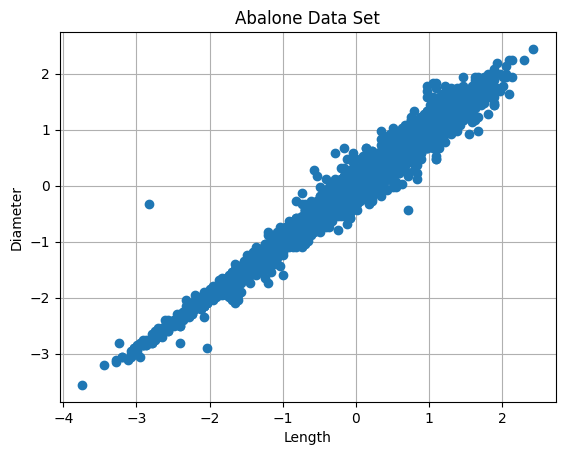

In [14]:
# Make a simple plot of the i'th attribute against the j'th attribute (Lenght vs Diameter)
plt.plot(stand_X[:, i], stand_X[:, j], "o")
#add the labels
plt.xlabel(attributeNames[i])
plt.ylabel(attributeNames[j])
plt.title('Abalone Data Set')
plt.grid()
plt.show()

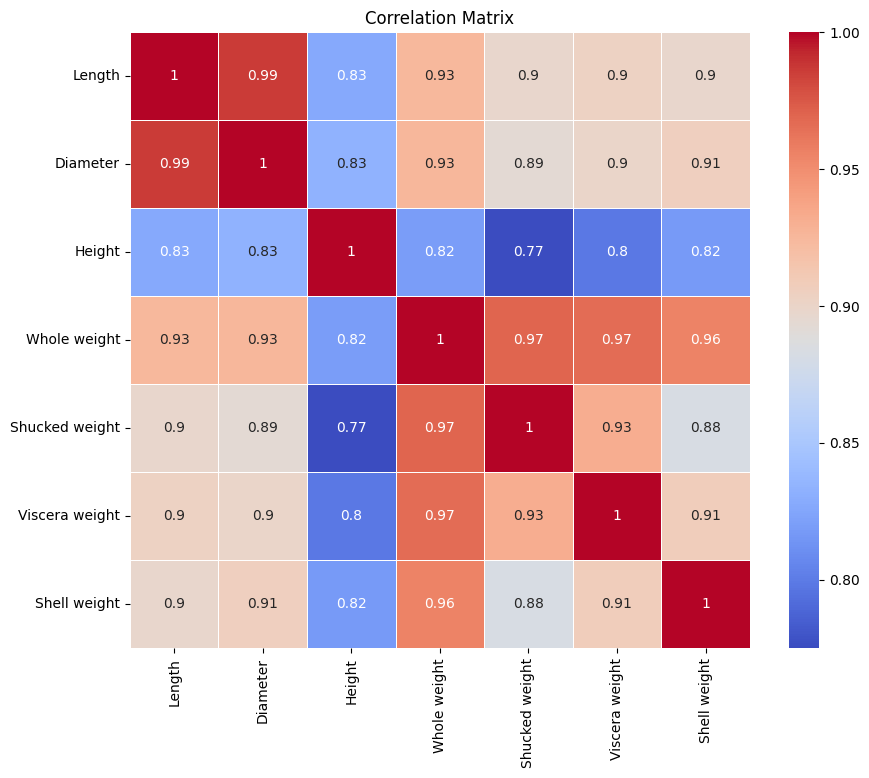

In [15]:
# Calculate the correlation matrix using NumPy
correlation_matrix = np.corrcoef(stand_X, rowvar=False)

# Create the correlation plot
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', xticklabels=attributeNames, yticklabels=attributeNames, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


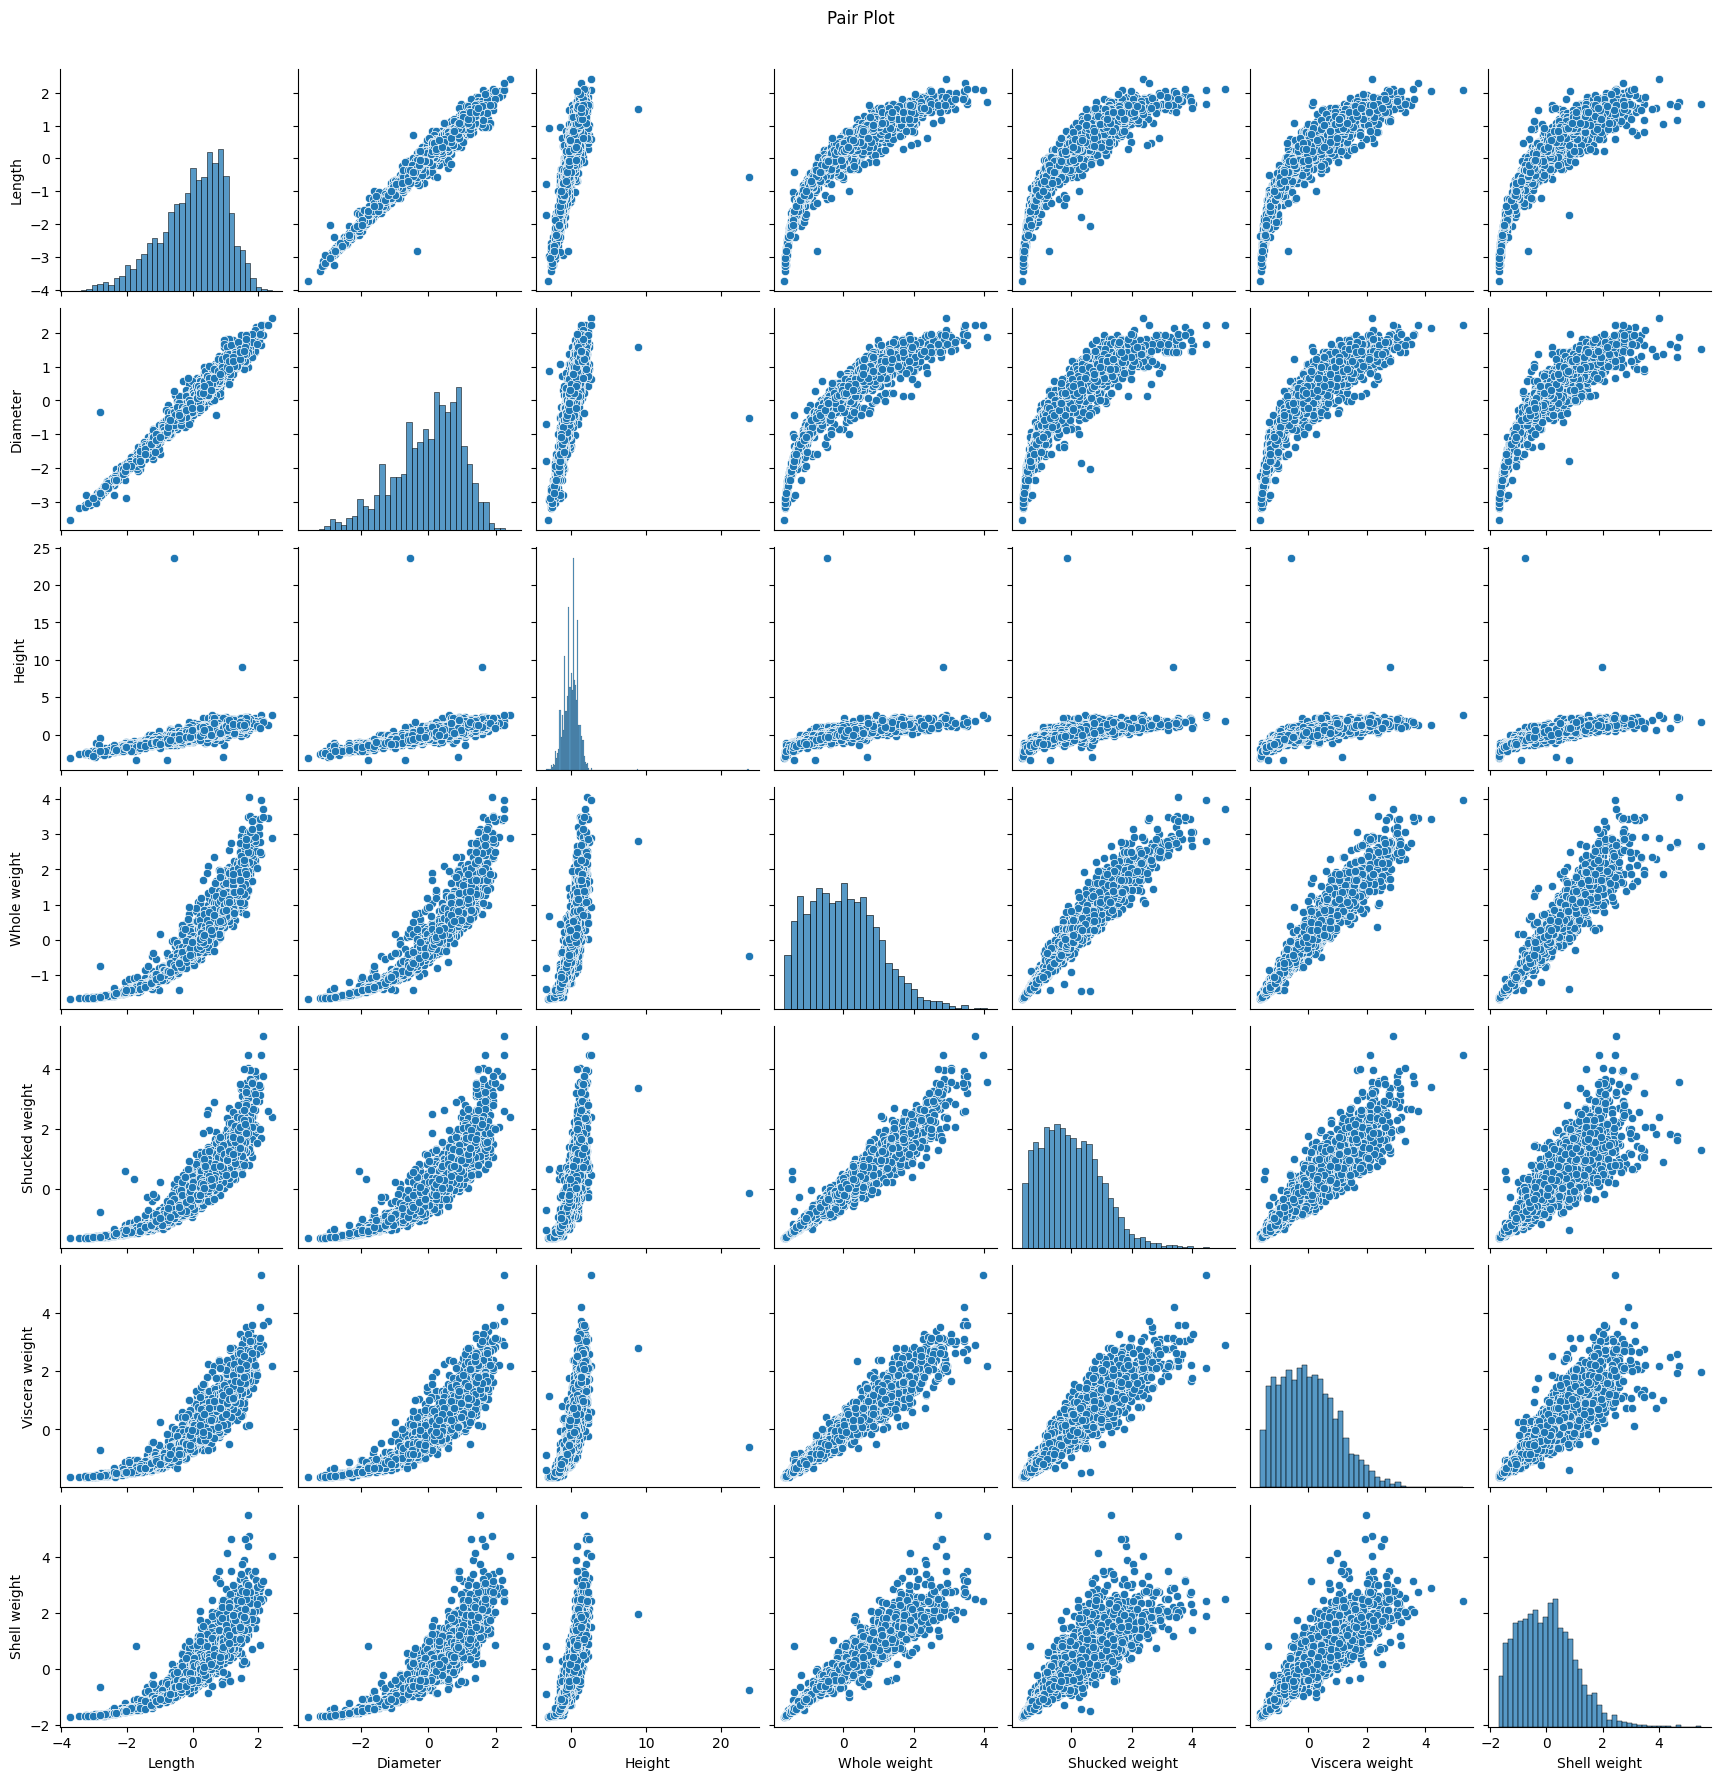

In [16]:
# Create a DataFrame
df = pd.DataFrame(stand_X, columns=attributeNames)

# Create the pair plot
sns.pairplot(df)
plt.suptitle('Pair Plot', y=1.02)
plt.show()

In [17]:
# Make another more fancy plot that includes legend, class labels,
# attribute names, and a title.
#f = plt.figure()
#plt.title("Abalone data")

#for c in range(C):
    # select indices belonging to class c:
    #class_mask = y == c 
    #plt.plot(X[class_mask, i], X[class_mask, j], "o", alpha=0.3)

#plt.legend(classNames)
#plt.xlabel(attributeNames[i])
#plt.ylabel(attributeNames[j])

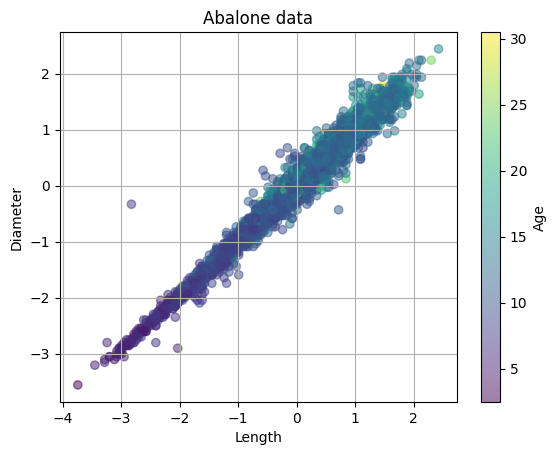

In [18]:
f = plt.figure()
plt.title("Abalone data")
plt.scatter(stand_X[:, 0], stand_X[:, 1], c=y, cmap="viridis", alpha=0.5)  # Color by age
plt.colorbar(label="Age")
plt.xlabel(attributeNames[0])
plt.ylabel(attributeNames[1])
plt.grid()
plt.show()


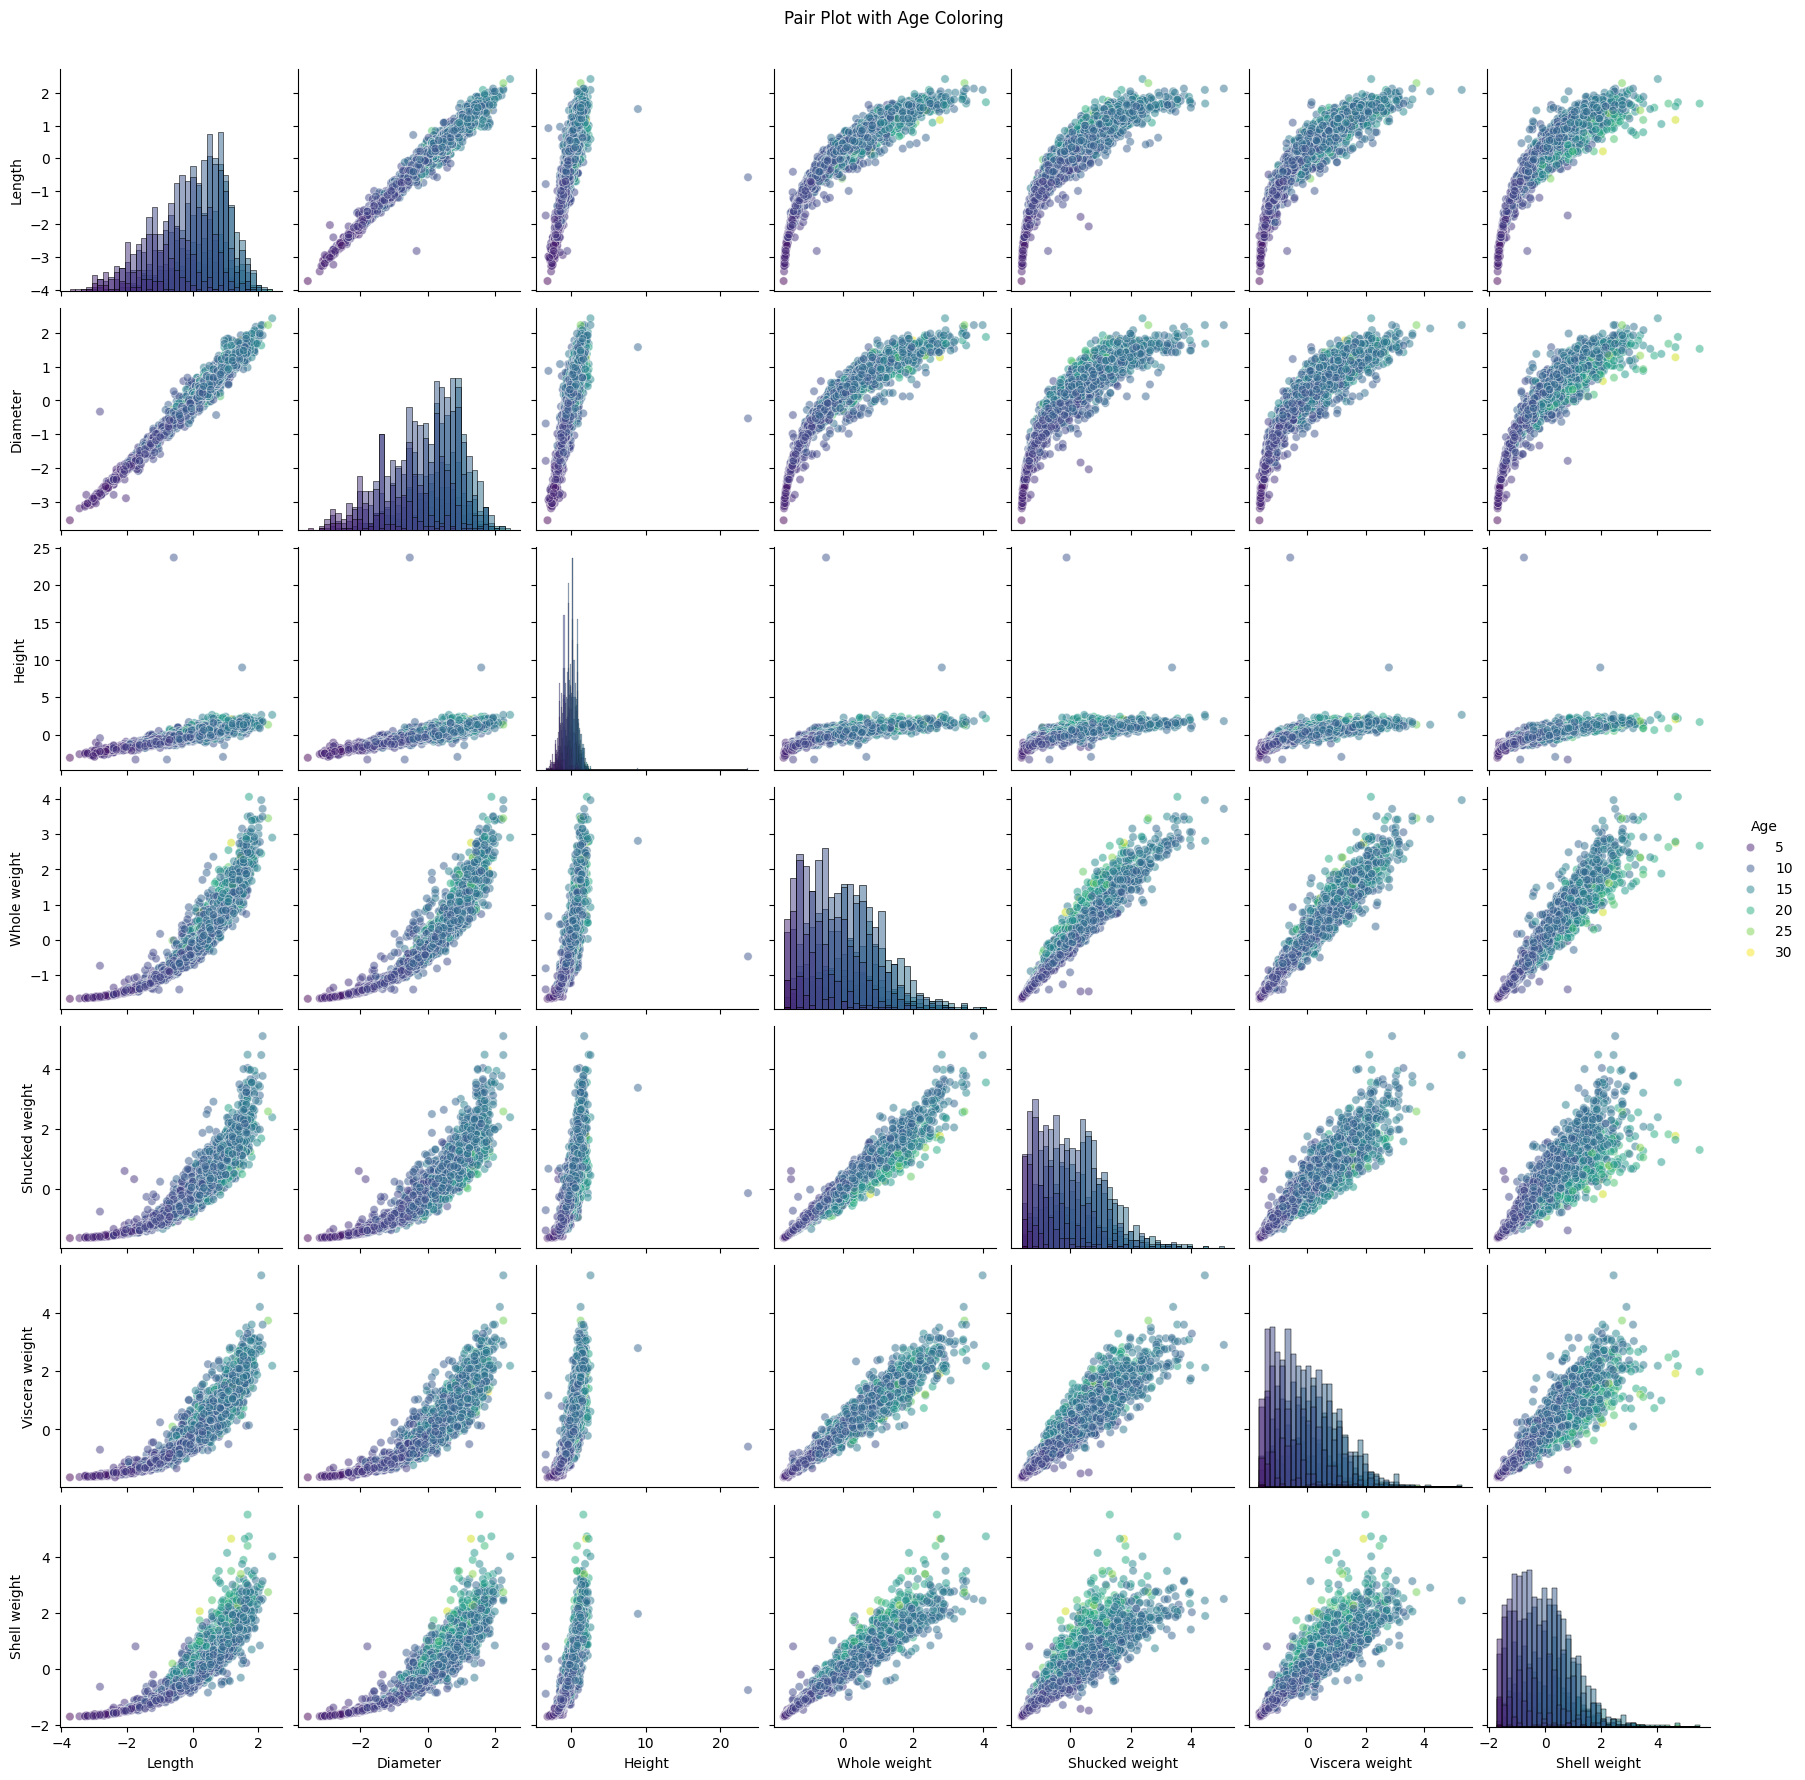

In [19]:
# Create a DataFrame
df = pd.DataFrame(stand_X, columns=attributeNames)
df['Age'] = y

# Create the pair plot with color coding
sns.pairplot(df, hue='Age', palette='viridis', diag_kind='hist', markers='o', plot_kws={'alpha': 0.5})
plt.suptitle('Pair Plot with Age Coloring', y=1.02)
plt.show()


 **PCA by computing SVD of Y**

In [20]:
#X = np.array(X, dtype=np.float64)

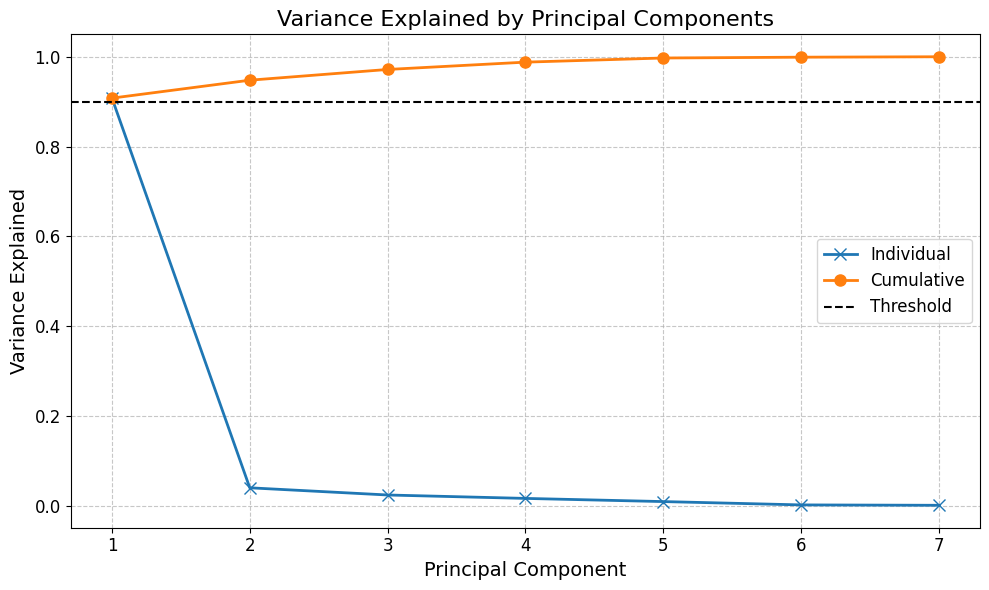

In [21]:
# Subtract mean value from data
# Note: Here we use Y to in teh book we often use X with a hat-symbol on top.
Y = stand_X - np.ones((N, 1)) * stand_X.mean(axis=0)

# Note: Here we call the Sigma matrix in the SVD S for notational convinience
U, S, Vh = svd(Y, full_matrices=False)

# scipy.linalg.svd returns "Vh", which is the Hermitian (transpose)
# of the vector V. So, for us to obtain the correct V, we transpose:
V = Vh.T

# Compute variance explained by principal components 
# Note: This is an important equation, see Eq. 3.18 on page 40 in the book.
rho = (S * S) / (S * S).sum()

threshold = 0.9

# Plot variance explained
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(rho) + 1), rho, "x-", label="Individual", markersize=8, linewidth=2)
plt.plot(range(1, len(rho) + 1), np.cumsum(rho), "o-", label="Cumulative", markersize=8, linewidth=2)
plt.axhline(y=threshold, color='k', linestyle='--', label="Threshold")

plt.title("Variance Explained by Principal Components", fontsize=16)
plt.xlabel("Principal Component", fontsize=14)
plt.ylabel("Variance Explained", fontsize=14)
plt.xticks(range(1, len(rho) + 1), fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()



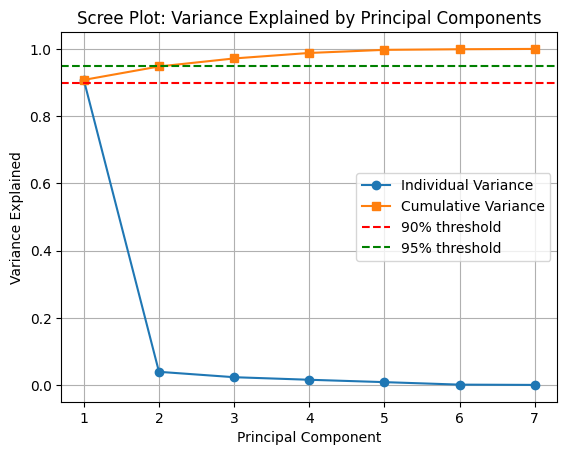

In [22]:
plt.figure()
plt.plot(range(1, len(rho) + 1), rho, "o-", label="Individual Variance")
plt.plot(range(1, len(rho) + 1), np.cumsum(rho), "s-", label="Cumulative Variance")
plt.axhline(y=0.9, color="r", linestyle="--", label="90% threshold")
plt.axhline(y=0.95, color="g", linestyle="--", label="95% threshold")
plt.title("Scree Plot: Variance Explained by Principal Components")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.legend()
plt.grid()
plt.show()


**The amount of variance explained as a function of the number of PCA components included.**

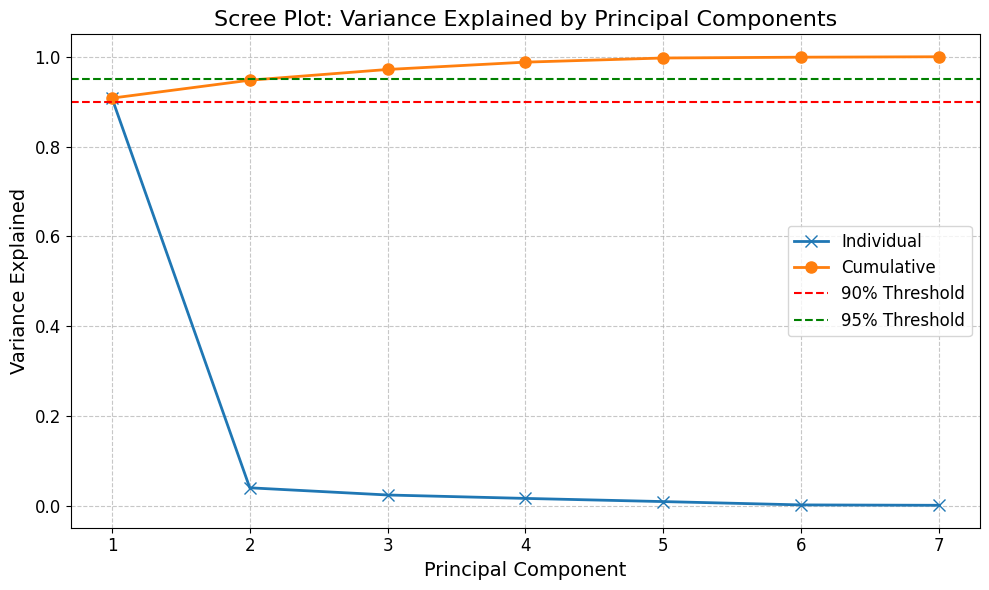

In [23]:
plt.figure(figsize=(10, 6))

plt.plot(range(1, len(rho) + 1), rho, "x-", label="Individual", markersize=8, linewidth=2)
plt.plot(range(1, len(rho) + 1), np.cumsum(rho), "o-", label="Cumulative", markersize=8, linewidth=2)

# Plot the threshold lines
plt.axhline(y=0.9, color="red", linestyle="--", label="90% Threshold")
plt.axhline(y=0.95, color="green", linestyle="--", label="95% Threshold")

# Add titles and labels
plt.title("Scree Plot: Variance Explained by Principal Components", fontsize=16)
plt.xlabel("Principal Component", fontsize=14)
plt.ylabel("Variance Explained", fontsize=14)
plt.xticks(range(1, len(rho) + 1), fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

**ChatGPT interpretation**

✅ For Dimensionality Reduction → Keep only the first 1-2 principal components.

✅ For Visualization → A scatter plot of PC1 vs. PC2 should be very informative.

✅ For Further Validation → Ensure your data is standardized (mean = 0, std = 1) before applying PCA.

More than the 90% of the variabily is explained with the first component, which leads us to think that we don't need more components.

**The data projected onto the considered principal components, e.g.  in 2D scatter plots(hint: it may be helpful to color code the points according to the value of the attributeyou wish to predict).**

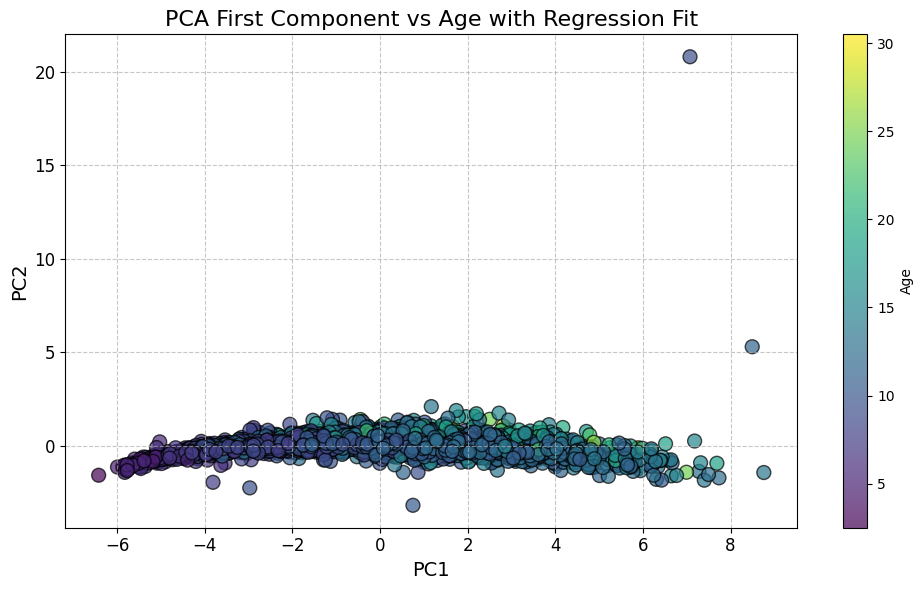

In [30]:
# Project the centered data onto principal component space
Z = Y @ V

# Indices of the principal components to be plotted (PC1 and PC2)
i = 0
j = 1

# Plot PCA of the data
plt.figure(figsize=(10, 6))
plt.scatter(Z[:, i], Z[:, j], c=y, cmap="viridis", alpha=0.7, edgecolor='k', s=100)
plt.colorbar(label="Age")
plt.title("PCA First Component vs Age with Regression Fit", fontsize=16)
plt.xlabel(f"PC{i+1}", fontsize=14)
plt.ylabel(f"PC{j+1}", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Contributions of each feature in the PCs**

**The principal directions of the considered PCA components.  Plot and interpret thecomponents in terms of the attributes**

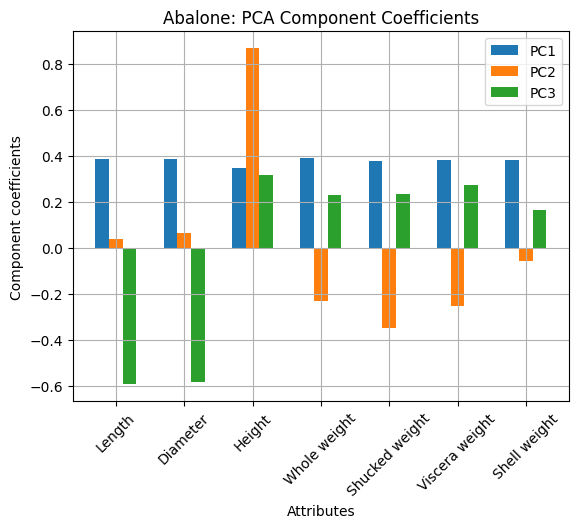

In [25]:
N, M = stand_X.shape

# We saw in 2.1.3 that the first 3 components explaiend more than 90
# percent of the variance. Let's look at their coefficients:
pcs = [0, 1, 2]
legendStrs = ["PC" + str(e + 1) for e in pcs]
bw = 0.2
r = np.arange(1, M + 1)

for i in pcs:
    plt.bar(r + i * bw, V[:, i], width=bw)

plt.xticks(r + bw,attributeNames, rotation = 45)
plt.xlabel("Attributes")
plt.ylabel("Component coefficients")
plt.legend(legendStrs)
plt.grid()
plt.title("Abalone: PCA Component Coefficients")
plt.show()

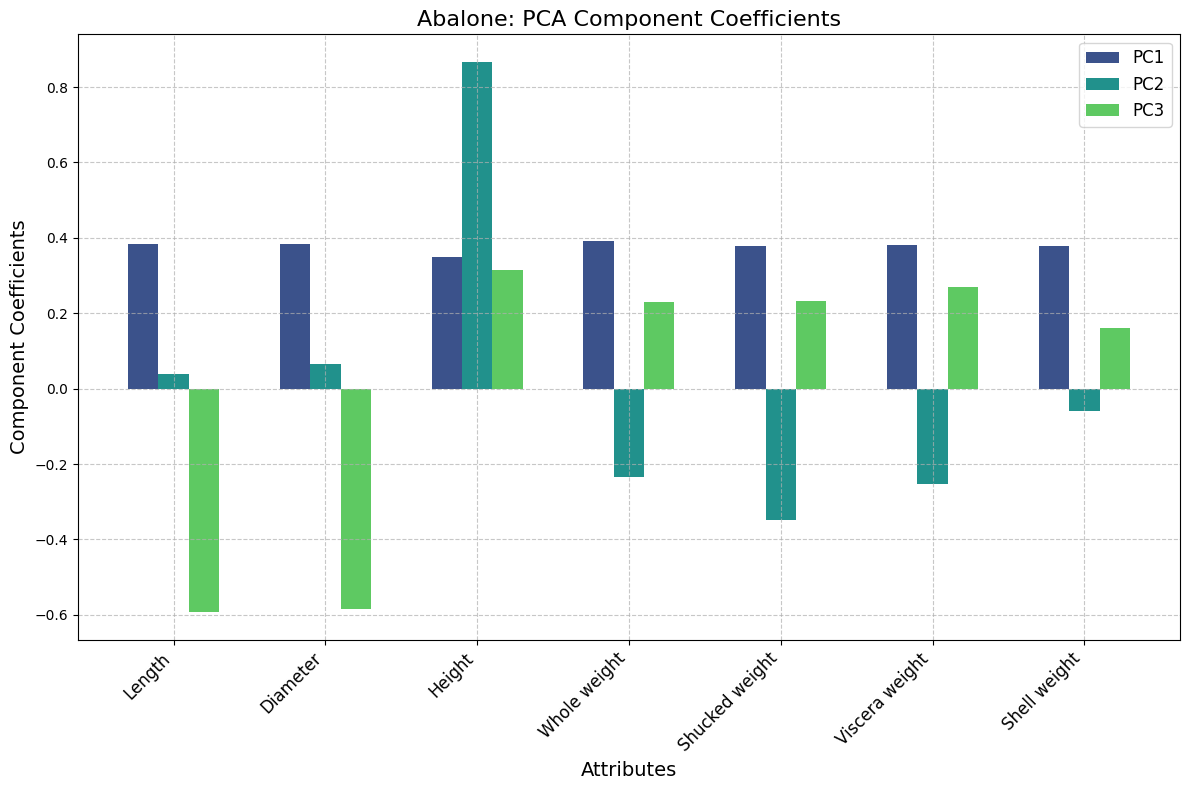

In [26]:
# Example data
N, M = stand_X.shape
pcs = [0, 1, 2]
legendStrs = ["PC" + str(e + 1) for e in pcs]
bw = 0.2
r = np.arange(1, M + 1)

# Get colors from the viridis palette
colors = sns.color_palette("viridis", len(pcs))

plt.figure(figsize=(12, 8))

for i in pcs:
    plt.bar(r + i * bw, V[:, i], width=bw, label=legendStrs[i], color=colors[i])

plt.xticks(r + bw, attributeNames, rotation=45, ha='right', fontsize=12)
plt.xlabel("Attributes", fontsize=14)
plt.ylabel("Component Coefficients", fontsize=14)
plt.title("Abalone: PCA Component Coefficients", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

To visualize the relative importance of each feature in each PC

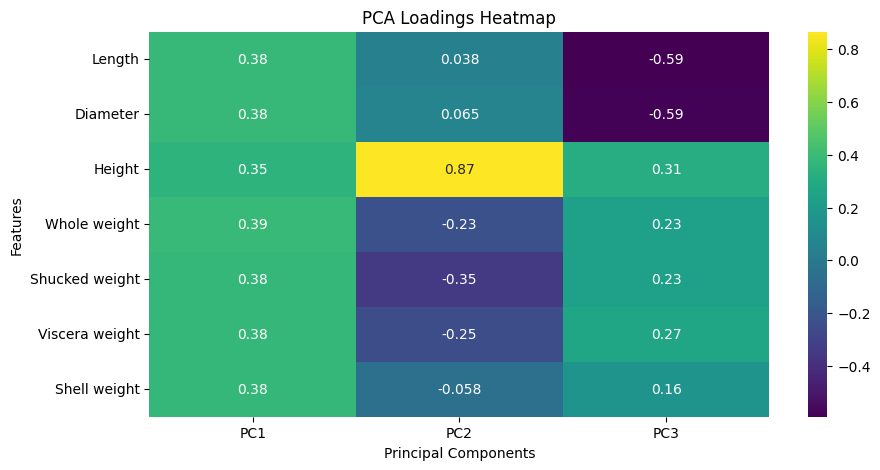

In [27]:
import seaborn as sns  

plt.figure(figsize=(10, 5))
sns.heatmap(V[:, :3], annot=True, cmap="viridis", xticklabels=["PC1", "PC2", "PC3"], yticklabels=attributeNames)
plt.title("PCA Loadings Heatmap")
plt.xlabel("Principal Components")
plt.ylabel("Features")
plt.show()


All the variables contribute more or less the same to the first component.

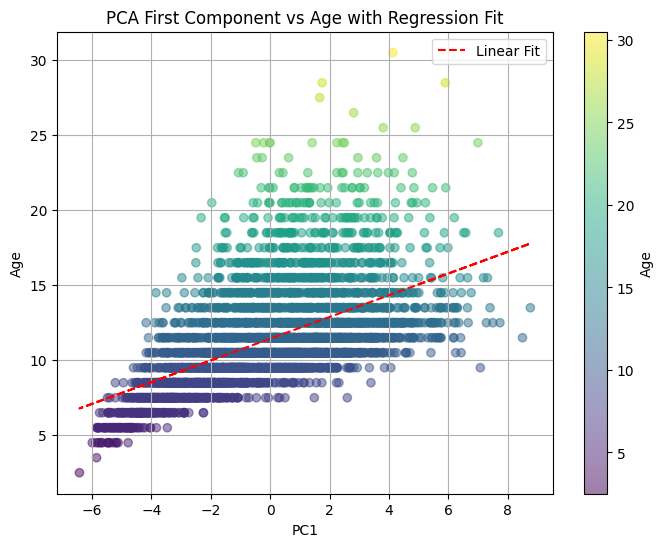

In [28]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Fit a simple regression model to PC1 vs Age
reg = LinearRegression()
reg.fit(Z[:, [0]], y)
y_pred = reg.predict(Z[:, [0]])

# Scatter plot with regression line
plt.figure(figsize=(8, 6))
plt.scatter(Z[:, 0], y, c=y, cmap="viridis", alpha=0.5)
plt.plot(Z[:, 0], y_pred, "r--", label="Linear Fit")
plt.colorbar(label="Age")
plt.xlabel("PC1")
plt.ylabel("Age")
plt.title("PCA First Component vs Age with Regression Fit")
plt.legend()
plt.grid()
plt.show()
